<img src="The-Northcap-University-NCU-logo.png">

In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# You can safely ignore any warnings on importing this
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Simple y=mx+b+noise data

In [ ]:
import pandas as pd
df = pd.read_csv("/content/02_Celsius to Fahrenheit.csv")
print(df)

    Celsius  Fahrenheit
0       -50       -58.0
1       -40       -40.0
2       -30       -22.0
3       -20        -4.0
4       -10        14.0
5        -9        15.8
6        -8        17.6
7        -7        19.4
8        -6        21.2
9        -5        23.0
10       -4        24.8
11       -3        26.6
12       -2        28.4
13       -1        30.2
14        0        32.0
15        1        33.8
16        2        35.6
17        3        37.4
18        4        39.2
19        5        41.0
20        6        42.8
21        7        44.6
22        8        46.4
23        9        48.2
24       10        50.0
25       20        68.0
26       30        86.0
27       40       104.0
28       50       122.0
29       60       140.0


In [ ]:
m = 1.8
b = 32
x=df.loc[:,"Celsius"]



In [ ]:
y = m*x + b

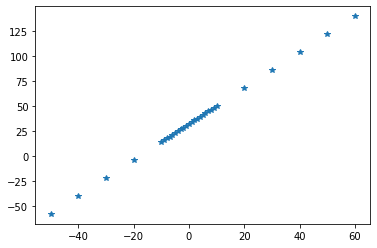

In [ ]:
plt.plot(x,y,'*')

## Creating a Neural Network for a Line of Best Fit

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
# 4 Neurons, expecting only 1 feature with input_dim=1
model.add(Dense(4, input_dim=1, activation='relu'))
# 4 Neurons (Play around with this number!)
model.add(Dense(4, activation='relu'))
# One final output of y, so only 1 neuron
model.add(Dense(1, activation='linear'))
# Compil the layers
model.compile(loss='mse', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 8         
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


## Train on Data

** NOTE: FOR THIS SIMPLE EXAMPLE, I WILL SKIP THE TRAIN TEST SPLIT!!!! **

In [ ]:
model.fit(x, y, epochs=500, verbose=1)

Epoch 1/500
1/1 [==============================] - 1s 618ms/step - loss: 1770.7780
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 1765.4800
Epoch 3/500
1/1 [==============================] - 0s 8ms/step - loss: 1760.1711
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 1754.8547
Epoch 5/500
1/1 [==============================] - 0s 7ms/step - loss: 1749.5298
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 1744.1964
Epoch 7/500
1/1 [==============================] - 0s 7ms/step - loss: 1738.8546
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 1733.5040
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 1728.1451
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 1722.7776
Epoch 11/500
1/1 [==============================] - 0s 6ms/step - loss: 1717.4012
Epoch 12/500
1/1 [==============================] - 0s 6ms/step - loss: 1712.0167
Epoch 13/500
1/1 [=====

## Predicting on new x points

Our previous x was 50 linspace points between 0 and 100. Let's predict for 1000 values between 0 and 100, drawing a line for our predictions (our line of best fit).

In [ ]:
x_for_predictions = np.linspace(0,50,1000)

In [ ]:
y_predicted = model.predict(x_for_predictions)

In [ ]:
# Original X and Y
plt.plot(x,y,'*')
# Our Model's prediction Line
plt.plot(x_for_predictions,y_predicted,'r')

# Evaluating Our Error

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
# Labels we do know
prediction_for_true_y = model.predict(x)

In [ ]:
mean_squared_error(y,prediction_for_true_y)

In [ ]:
mean_absolute_error(y,prediction_for_true_y)

 Notice how MSE value was being reported out by Keras during training!

 Is this a good error value? Really depends on the context!